In [1]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt

from dateutil import parser
from wordcloud import WordCloud
from scripts import MONGO_URL
from scripts.analysis import data, plot

plot.init_matplotlib()


def get_corpus(repo_names: list[str]) -> tuple[dict[str, int], list[list[str]]]:
    word_freq = {}
    text_corpora = []
    for repo in repo_names:
        repo_name = repo.split("/")[1]
        text = []
        for x in repo_name.split("-"):
            for y in x.split("_"):
                for word in y.split("."):
                    if len(word) <= 1:
                        continue
                    word = word.lower()
                    if word in word_freq:
                        word_freq[word] += 1
                        text.append(word)
                    else:
                        word_freq[word] = 1
                        text.append(word)
        if len(text) > 0:
            text_corpora.append(text)
    return word_freq, text_corpora

In [2]:
repos = data.get_fake_star_repos()
repos_with_campaign = data.get_repos_with_campaign()
repos = repos[repos.repo_name.isin(repos_with_campaign)]
repo_to_active, missing = dict(), 0
with pymongo.MongoClient(MONGO_URL) as client:
    for repo in repos_with_campaign:
        events = list(
            client.fake_stars.fake_repo_events.find({"repo": repo}).sort(
                "created_at", pymongo.ASCENDING
            )
        )
        if len(events) == 0:
            repo_to_active[repo] = np.nan
        else:
            repo_to_active[repo] = (
                parser.parse(events[-1]["created_at"])
                - parser.parse(events[0]["created_at"])
            ).days + 1
repos["active_days"] = repos.repo_name.map(lambda x: repo_to_active[x])

[('bot', 1030), ('crack', 705), ('2024', 701), ('adobe', 546), ('free', 536), ('auto', 509), ('pro', 470), ('activation', 435), ('autoclicker', 391), ('crypto', 301), ('hack', 296), ('cracked', 259), ('version', 254), ('ai', 248), ('generator', 236), ('main', 229), ('wallet', 222), ('executor', 191), ('studio', 186), ('download', 185)]


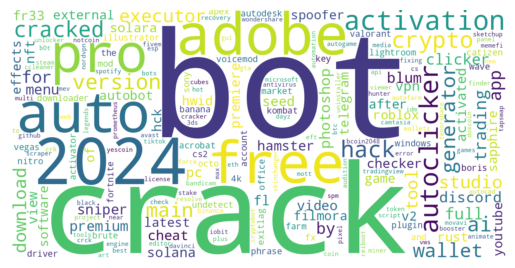

In [3]:
word_freq, text_corpora = get_corpus(repos_with_campaign)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud.pdf", bbox_inches="tight")

[('bot', 954), ('crack', 700), ('2024', 681), ('adobe', 538), ('free', 518), ('auto', 503), ('pro', 464), ('activation', 434), ('autoclicker', 384), ('crypto', 297), ('hack', 294), ('cracked', 256), ('version', 250), ('ai', 232), ('generator', 225), ('main', 223), ('wallet', 214), ('executor', 188), ('studio', 183), ('download', 181)]


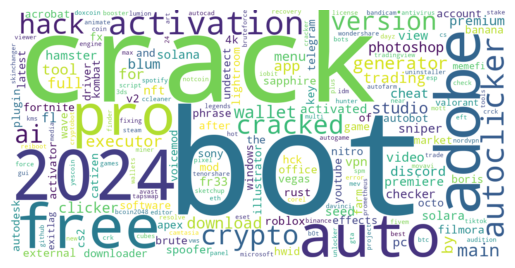

In [4]:
# deleted repos
word_freq, text_corpora = get_corpus(
    repos_with_campaign & set(repos[repos.repo_id.isna()].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-deleted.pdf", bbox_inches="tight")

[('bot', 76), ('telegram', 29), ('sniper', 22), ('app', 21), ('2024', 20), ('api', 20), ('project', 19), ('free', 18), ('token', 17), ('android', 17), ('github', 17), ('products', 16), ('ai', 16), ('sdk', 16), ('dart', 15), ('azkadev', 14), ('web', 14), ('solana', 14), ('face', 13), ('create', 13)]


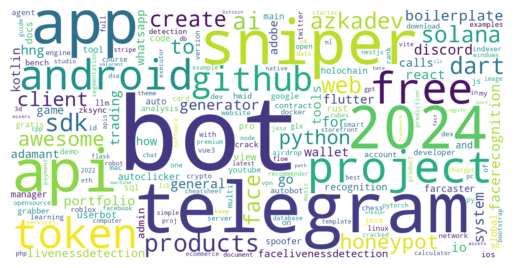

In [5]:
word_freq, text_corpora = get_corpus(
    repos_with_campaign & set(repos[repos.repo_id.notna()].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-nondeleted.pdf", bbox_inches="tight")

[('bot', 40), ('telegram', 28), ('products', 16), ('dart', 15), ('api', 15), ('azkadev', 14), ('app', 13), ('github', 12), ('ai', 10), ('client', 9), ('web', 9), ('adamant', 8), ('sdk', 8), ('to', 8), ('whatsapp', 8), ('global', 7), ('token', 7), ('face', 7), ('userbot', 7), ('project', 7)]


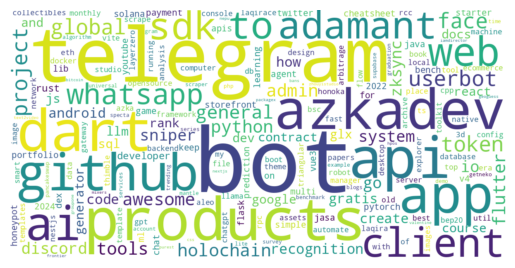

In [6]:
word_freq, text_corpora = get_corpus(
    repos_with_campaign
    & set(repos[repos.repo_id.notna() & (repos.active_days >= 90)].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-nondeleted.pdf", bbox_inches="tight")

In [7]:
repos[repos.repo_id.notna() & (repos.active_days >= 30)]

,repo_id,repo_name,n_stars,n_stars_latest,n_stars_low_activity,p_stars_low_activity,n_stars_clustered,p_stars_clustered,p_stars_fake,active_days
678,R_kgDOJLNGUg,mr-teslaa/ai-introduction-uni-course,171.0,17.0,0.0,0.0,171.0,1.000000,1.000000,472.0
806,R_kgDOKHrCPg,riazsha/cardanimation,52.0,51.0,0.0,0.0,52.0,1.000000,1.000000,299.0
814,R_kgDOKJn0iw,riazsha/gemstay,86.0,92.0,0.0,0.0,86.0,1.000000,1.000000,300.0
907,R_kgDOJhMFXg,alpereneskici/azure-pipline-test,53.0,0.0,0.0,0.0,53.0,1.000000,1.000000,342.0
943,R_kgDOJzAVjA,mr-teslaa/sentiment-analysis-api,186.0,24.0,0.0,0.0,186.0,1.000000,1.000000,376.0
...,...,...,...,...,...,...,...,...,...,...
18705,MDEwOlJlcG9zaXRvcnk4NjA5NTEyMw==,coells/100days,1480.0,7470.0,0.0,0.0,168.0,0.113514,0.113514,1920.0
18724,MDEwOlJlcG9zaXRvcnkyNDY3Njg2MTE=,Adamant-im/adamant-tradebot,574.0,538.0,0.0,0.0,64.0,0.111498,0.111498,1663.0
18731,R_kgDOKX2BYQ,ethstorage/es-node,946.0,1143.0,0.0,0.0,105.0,0.110994,0.110994,327.0
18795,MDEwOlJlcG9zaXRvcnkxNTQ3OTczOTE=,Adamant-im/ETH-transactions-storage,647.0,616.0,0.0,0.0,68.0,0.105100,0.105100,1863.0


In [18]:
import re
import nltk
import gensim
import pandas as pd
from pprint import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"\W|\d", " ", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tokens = simple_preprocess(" ".join(tokens), deacc=True)
    return tokens


long_living_repos = repos[repos.repo_id.notna() & (repos.active_days >= 90)]
readmes = pd.read_csv("data/readmes/summary.csv")
readmes["content"] = readmes.readme.map(lambda x: open(x).read())
readmes = readmes[readmes.repo.isin(long_living_repos.repo_name)]

processed_readme_conent = [preprocess_text(text) for text in readmes.content]
processed_readme_conent = [text for text in processed_readme_conent if len(text) > 0]
id2word = Dictionary(processed_readme_conent)
id2word.filter_extremes(no_below=5, no_above=0.5)
corpus = [id2word.doc2bow(text) for text in processed_readme_conent]
print("Sample Dictionary (id2word):", list(id2word.items())[:10])
print("Sample Corpus entry:", corpus[0][:10])

[nltk_data] Downloading package stopwords to /home/haohe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/haohe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/haohe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample Dictionary (id2word): [(0, 'accepts'), (1, 'access'), (2, 'accuracy'), (3, 'accurate'), (4, 'activate'), (5, 'add'), (6, 'allows'), (7, 'along'), (8, 'already'), (9, 'also')]
Sample Corpus entry: [(0, 2), (1, 1), (2, 1), (3, 1), (4, 3), (5, 2), (6, 1), (7, 1), (8, 1), (9, 5)]


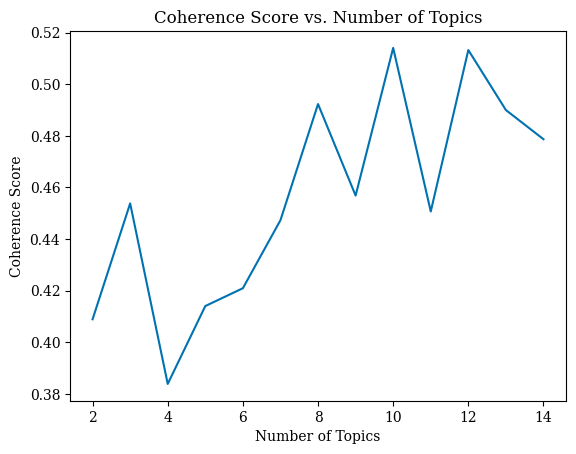

Number of Topics = 2, Coherence Score = 0.40893459204518046
Number of Topics = 3, Coherence Score = 0.45382723685832144
Number of Topics = 4, Coherence Score = 0.3838902525636674
Number of Topics = 5, Coherence Score = 0.4140593786306116
Number of Topics = 6, Coherence Score = 0.42096463178497084
Number of Topics = 7, Coherence Score = 0.4473264987345852
Number of Topics = 8, Coherence Score = 0.49232514243797154
Number of Topics = 9, Coherence Score = 0.45687459597384095
Number of Topics = 10, Coherence Score = 0.5140726201596248
Number of Topics = 11, Coherence Score = 0.45070694592219424
Number of Topics = 12, Coherence Score = 0.5132495042253057
Number of Topics = 13, Coherence Score = 0.4899910938430192
Number of Topics = 14, Coherence Score = 0.4787002022072983


In [14]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            update_every=1,
            passes=10,
            alpha="auto",
            per_word_topics=True,
        )
        model_list.append(model)

        coherence_model = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherence_model.get_coherence())
        
    return model_list, coherence_values


start = 2  # Minimum number of topics
limit = 15  # Maximum number of topics
step = 1  # Step size for the number of topics

model_list, coherence_values = compute_coherence_values(
    dictionary=id2word,
    corpus=corpus,
    texts=processed_readme_conent,
    start=start,
    limit=limit,
    step=step,
)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

for m, cv in zip(x, coherence_values):
    print(f"Number of Topics = {m}, Coherence Score = {cv}")

In [20]:
def lda_to_dataframe(model, num_words=10):
    num_topics = model.num_topics
    topic_data = {"Topic": [], "Num_Docs": []}
    for i in range(num_words):
        topic_data[f"Word_{i+1}"] = []
    for topic_num in range(num_topics):
        words = model.show_topic(topic_num, topn=num_words)
        for i, (word, weight) in enumerate(words):
            topic_data[f"Word_{i+1}"].append(word + f" ({weight:.2f})")
        for i in range(len(words), num_words):
            topic_data[f"Word_{i+1}"].append(None)
        num_docs_in_topic = sum(
            1 for doc in corpus if doc and max(doc, key=lambda x: x[1])[0] == topic_num
        )
        topic_data["Topic"].append(f"Topic {topic_num}")
        topic_data["Num_Docs"].append(num_docs_in_topic)
    df = pd.DataFrame(topic_data)
    return df


model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=42,
    update_every=1,
    passes=10,
    alpha="auto",
    per_word_topics=True,
)

lda_to_dataframe(model)

,Topic,Num_Docs,Word_1,Word_2,Word_3,Word_4,Word_5,Word_6,Word_7,Word_8,Word_9,Word_10
0,Topic 0,0,global (0.04),telegram (0.03),bot (0.02),corporation (0.02),cara (0.02),beli (0.02),userbot (0.02),center (0.01),align (0.01),allows (0.01)
1,Topic 1,0,sup (0.32),university (0.03),language (0.02),option (0.01),arxiv (0.01),agent (0.01),models (0.01),large (0.01),project (0.01),github (0.01)
2,Topic 2,0,data (0.01),python (0.01),model (0.01),code (0.01),use (0.01),user (0.01),api (0.01),using (0.01),open (0.01),project (0.00)
3,Topic 3,0,data (0.02),code (0.02),token (0.02),pdf (0.02),img (0.01),class (0.01),size (0.01),width (0.01),height (0.01),alt (0.01)
4,Topic 4,0,run (0.01),license (0.01),build (0.01),install (0.01),test (0.01),file (0.01),bash (0.01),docker (0.01),use (0.01),png (0.01)
5,Topic 5,1,href (0.02),img (0.02),align (0.01),alt (0.01),width (0.01),time (0.01),center (0.01),model (0.01),data (0.01),series (0.01)
6,Topic 6,0,global (0.04),telegram (0.03),bot (0.03),corporation (0.02),userbot (0.02),app (0.02),cara (0.02),dan (0.02),kamu (0.01),yang (0.01)
7,Topic 7,0,video (0.03),day (0.02),data (0.01),dart (0.01),model (0.01),bash (0.01),training (0.01),generation (0.01),yaml (0.01),code (0.01)
8,Topic 8,0,img (0.04),alt (0.03),align (0.02),center (0.02),new (0.02),div (0.02),width (0.02),href (0.02),network (0.02),height (0.01)
9,Topic 9,0,string (0.02),import (0.02),calculation (0.01),class (0.01),github (0.01),public (0.01),function (0.01),java (0.01),name (0.01),data (0.01)


In [29]:
#Can GitHub tags tell us anything?
from tqdm import tqdm
from github import Github
from scripts import GITHUB_TOKENS

g = Github(GITHUB_TOKENS[0])
repo_tags = {}
repo_descriptions = {}
for repo_name in tqdm(long_living_repos.repo_name):
    try:
        repo = g.get_repo(repo_name)
        tags = repo.get_topics()
        repo_tags[repo_name] = [tag for tag in tags]
        repo_descriptions[repo_name] = repo.description
    except Exception as e:
        print(f"Error fetching tags for {repo_name}: {e}")
        repo_tags[repo_name] = None
long_living_repos = long_living_repos.copy()
long_living_repos["tags"] = long_living_repos.repo_name.map(lambda x: repo_tags.get(x))
long_living_repos["description"] = long_living_repos.repo_name.map(lambda x: repo_descriptions.get(x))
long_living_repos.to_csv("data/long_living_repos.csv", index=False)

  1%|          | 4/718 [00:02<07:09,  1.66it/s]

Error fetching tags for alpereneskici/azure-pipline-test: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest/repos/repos#get-a-repository", "status": "404"}


 11%|█         | 80/718 [00:59<06:44,  1.58it/s]

Error fetching tags for cm609/formulario_flask: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest", "status": "404"}


 18%|█▊        | 129/718 [01:36<06:16,  1.56it/s]

Error fetching tags for Amy-Sims/Kr4iw: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest", "status": "404"}


 31%|███       | 222/718 [02:47<05:13,  1.58it/s]

Error fetching tags for MrHardik-k/MrHardik-k1: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest/repos/repos#get-a-repository", "status": "404"}


 44%|████▍     | 318/718 [04:01<03:59,  1.67it/s]

Error fetching tags for xdeyyan/Tron-Profanity: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest", "status": "404"}


 67%|██████▋   | 479/718 [06:03<02:23,  1.66it/s]

Error fetching tags for deoiskn/SAPPHlRE-PIugin-2024-fuII: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest", "status": "404"}


 99%|█████████▊| 709/718 [09:01<00:05,  1.53it/s]

Error fetching tags for max32002/tixcraft_bot: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest/repos/repos#get-a-repository", "status": "404"}


100%|██████████| 718/718 [09:08<00:00,  1.31it/s]
